<a href="https://colab.research.google.com/github/sidddheshh/IMDB_datasetAnalysis/blob/main/FIFA_databaseAnalyis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION
**Performing Data Analysis on FIFA Players Live Data.**

Link: https://sofifa.com/players?r=230011&set=true&offset=

**FLOW**:
1. Scrap the data.
2. Data Cleaning.
3. convert data into DataFrame
4. perform the Data Analysis(EDA)-DC,DE,DM,DV


In [ ]:
# Q1. Give the logic to print the URL for all the 10 pages fo the given website
for i in range(10):
  print(f"https://sofifa.com/players?offset={i*60}")


https://sofifa.com/players?offset=0
https://sofifa.com/players?offset=60
https://sofifa.com/players?offset=120
https://sofifa.com/players?offset=180
https://sofifa.com/players?offset=240
https://sofifa.com/players?offset=300
https://sofifa.com/players?offset=360
https://sofifa.com/players?offset=420
https://sofifa.com/players?offset=480
https://sofifa.com/players?offset=540


# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

# Scraping Data from Website

In [ ]:
# defining URL variable and headers as user agent to gain access 

url='https://sofifa.com/players?r=230011&set=true&offset=' 
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}

In [ ]:
# creating a request variable and extracting data using GET request 

req = requests.get(url, headers=headers)

In [ ]:
# status = 200 means "OK"
req.status_code

200

In [ ]:
# scraping data

soup=BeautifulSoup(req.content)

In [ ]:
soup.prettify()

'<!DOCTYPE html>\n<html lang="en-US">\n <head id="head">\n  <title>\n   Players FIFA 23 Jan 25, 2023 SoFIFA\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <meta content="VGaFvm9Qm-qhCd2LCDi8QKWXNPSrVE2SJ2iT8c3vI1g" name="google-site-verification"/>\n  <meta content="FIFA 23 player ratings on Jan 25, 2023" name="description"/>\n  <meta content="2009 - 2023 SoFIFA.com" name="copyright"/>\n  <meta content="light" name="twitter:widgets:theme"/>\n  <meta content="#e6e6e6" name="twitter:widgets:border-color"/>\n  <link href="https://static.sofifa.net/launcher-icon.png" rel="shortcut icon"/>\n  <link href="https://static.sofifa.net/launcher-icon.png" rel="apple-touch-icon"/>\n  <script>\n   window.ramp = window.ramp || {};window.ramp.que = window.ramp.que || [];\n  </script>\n  <link href="https://sofifa.com/players?hl=en-US" hreflang="en" rel="alternate"/>\n  <link href="https://sofifa.com/players?hl=fr-FR" hreflang="fr" rel

In [ ]:
# creating an Empty List to store individual players data
arr=[]

In [ ]:
# appending players data into the list 

arr = [i for i in soup.findAll('tr')]

In [ ]:
del arr[0]

In [ ]:
arr[5]

<tr>
<td class="col-avatar"><figure class="avatar updated " data-tip-pos="right" role="tooltip">
<img alt="" class="player-check" data-root="https://cdn.sofifa.net/players/" data-src="https://cdn.sofifa.net/players/209/331/23_60.png" data-srcset="https://cdn.sofifa.net/players/209/331/23_120.png 2x, https://cdn.sofifa.net/players/209/331/23_180.png 3x" data-type="player" id="209331" src="https://cdn.sofifa.net/players/notfound_0_60.png"/>
<div class="tip"><div class="block-quarter half-spacing pure-u-1-1">FIFA 23 Jan 25, 2023</div><div class="block-quarter pure-g"><span class="pure-u-17-24"><span class="bp3-tag p p-90">90</span> <svg class="go-down" height="18" viewbox="0 0 24 24" width="18"><line x1="7" x2="17" y1="7" y2="17"></line><polyline points="17 7 17 17 7 17"></polyline></svg> <span class="bp3-tag p p-89">89</span></span> <abbr class="pure-u-7-24">Dribbling</abbr></div><div class="block-half pure-g"><abbr class="pure-u-7-24">Contract Valid Until</abbr> <span class="pure-u-17-2

In [ ]:
# using RE to get IMAGE LINK

re.sub('^<img.*data-srcset="| .*/>', '' , str(arr[0].find('img',{"class": "player-check"})))

'https://cdn.sofifa.net/players/231/747/23_120.png'

In [ ]:
# using RE to get Players Name 

re.sub('^<a.*">|<.*>','',str(arr[0].find('a',{'role':"tooltip"})))

'K. Mbappé'

In [ ]:
# using RE to get Players Age

re.sub('^<t.*">|<.*>','',str(arr[0].find('td',{'class': 'col col-ae'})))

'23'

In [145]:
# using RE to get Players OVA

re.sub('^<.*">|<.*>','',str(arr[5].find('td',{'class': 'col col-oa col-sort'})))

'90'

In [ ]:
# using RE to get Players POT

re.sub('^<.*">|<.*>','',str(arr[0].find('td',{'class': 'col col-pt'})))

'95'

In [ ]:
# using RE to get Players Team 

re.sub('^<.*">|<.*>','',str(arr[0].findAll("a")[-1]))

'Paris Saint Germain'

In [ ]:
# using RE to get Players Contract(duration)

re.sub('^<.*\n|<.*>','',str(arr[0].find('div',{'class': 'sub'})))

'2018 ~ 2024'

In [ ]:
# using RE to get Players Value

re.sub('^<.*">€|<.*>','',str(arr[0].find("td",{'class':"col col-vl"})))

'190.5M'

In [ ]:
# using RE to get Players Wage

re.sub('^<.*">€|<.*>','',str(arr[0].find("td",{'class':"col col-wg"})))

'230K'

In [ ]:
# using RE to get Players Total Rating

re.sub('^<.*">|<.*>','',str(arr[0].find('span',{'class': 'bp3-tag p'})))

'2181'

# Creating Dataframe

In [ ]:
# defining columns

columns=['Image_link','Name','Age','OVA','POT','Team','Contract','Value','Wage','Total']

In [147]:
# creating dataframe named fifa_final

fifa_final = pd.DataFrame()

for i in range(0,541,60):
  url = f'https://sofifa.com/players?r=230011&set=true&offset={i}'
  req=requests.get(url,headers=headers)
  if req.status_code == 200:
    soup = BeautifulSoup(req.content)
    lists=[[] for _ in range(10)]
    # storing data 

    for i in soup.findAll('tr'):
      Image_link = re.sub('^<img.*data-srcset="| .*/>', '' , str(i.find('img',{"class": "player-check"})))
      Name = re.sub('^<a.*">|<.*>','',str(i.find('a',{'role':"tooltip"})))
      Age = re.sub('^<t.*">|<.*>','',str(i.find('td',{'class': 'col col-ae'})))
      OVA = re.sub('^<.*">|<.*>','',str(i.find('td',{'class': 'col col-oa col-sort'})))
      POT = re.sub('^<.*">|<.*>','',str(i.find('td',{'class': 'col col-pt'})))
      team = re.sub('^<.*">|<.*>','',str(i.findAll("a")[-1]))
      duration = re.sub('^<.*\n|<.*>','',str(i.find('div',{'class': 'sub'})))
      value = re.sub('^<.*">€|<.*>','',str(i.find("td",{'class':"col col-vl"})))
      wage = re.sub('^<.*">€|<.*>','',str(i.find("td",{'class':"col col-wg"})))
      total = re.sub('^<.*">|<.*>','',str(i.find('span',{'class': 'bp3-tag p'})))

      # appending data into lists

      lists[0].append(Image_link)
      lists[1].append(Name)
      lists[2].append(Age)
      lists[3].append(OVA)
      lists[4].append(POT)
      lists[5].append(team)
      lists[6].append(duration)
      lists[7].append(value)
      lists[8].append(wage)
      lists[9].append(total)

# updating DataFrame

  fifa = pd.DataFrame({"Image_link":lists[0],
                        "Name": lists[1],
                        "Age": lists[2],
                        "OVA": lists[3],
                        "POT": lists[4],
                        "Team": lists[5],
                        "Duration": lists[6],
                        "Value": lists[7],
                        "Wage": lists[8],
                        "Total_stats": lists[9]})


  fifa.drop(0, inplace =True)

  fifa['Age'] = pd.to_numeric(fifa['Age'])
  fifa['OVA'] = pd.to_numeric(fifa['OVA'])
  fifa['POT'] = pd.to_numeric(fifa['POT'])
  fifa['Total_stats'] = pd.to_numeric(fifa['Total_stats'])

# appending data into fifa_final DataFrame
  fifa_final = fifa_final.append(fifa, ignore_index=True)



In [ ]:
fifa_final.shape

(600, 10)

In [184]:
# Delete the  Image Link , Duration column
# since we dont have any further use for the above columns

fifa_final.drop(['Image_link','Duration'],axis=1, inplace= True)

In [196]:
fifa_final.head()

,Name,Age,OVA,POT,Team,Value(M),Wage,Total_stats
0,K. Mbappé,23,91,95,Paris Saint Germain,190.5,230K,2181
1,K. De Bruyne,31,91,91,Manchester City,107.5,350K,2298
2,R. Lewandowski,33,91,91,FC Barcelona,84.0,420K,2205
3,K. Benzema,34,91,91,Real Madrid,64.0,450K,2147
4,L. Messi,35,91,91,Paris Saint Germain,54.0,195K,2190


In [195]:
fifa_final.tail()

,Name,Age,OVA,POT,Team,Value(M),Wage,Total_stats
595,J. Correa,27,79,79,Inter,19.0,71K,1945
596,L. Zelarayán,30,79,79,Columbus Crew,17.0,12K,2032
597,F. Armani,35,79,79,River Plate,1.9,10K,1291
598,S. Azmoun,27,79,79,Bayer 04 Leverkusen,19.0,60K,1973
599,F. Bernardeschi,28,79,79,Toronto,17.5,12K,2089


In [ ]:
fifa_final.columns

Index(['Image_link', 'Name', 'Age', 'OVA', 'POT', 'Team', 'Duration', 'Value',
       'Wage', 'Total_stats'],
      dtype='object')

In [ ]:
# checking basic information of the dataset

fifa_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image_link   600 non-null    object
 1   Name         600 non-null    object
 2   Age          600 non-null    int64 
 3   OVA          600 non-null    int64 
 4   POT          600 non-null    int64 
 5   Team         600 non-null    object
 6   Duration     600 non-null    object
 7   Value        600 non-null    object
 8   Wage         600 non-null    object
 9   Total_stats  600 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 47.0+ KB


In [194]:
# checking statistical information of the dataset

fifa_final.describe()

,Age,OVA,POT,Value(M),Total_stats
count,600.000000,600.000000,600.000000,600.000000,600.000000
mean,27.398333,81.915000,83.750000,34.275667,1953.541667
std,3.961374,2.610709,3.230308,22.547575,265.848712
min,17.000000,79.000000,79.000000,0.000000,1070.000000
25%,24.750000,80.000000,81.000000,20.500000,1907.000000
50%,27.000000,81.000000,83.000000,27.750000,2033.000000
75%,30.000000,83.000000,86.000000,42.000000,2122.000000
max,40.000000,91.000000,95.000000,190.500000,2312.000000


# EDA


In [143]:
# How many null values are there in the column ?

fifa_final.isna().sum()

Image_link     0
Name           0
Age            0
OVA            0
POT            0
Team           0
Duration       0
Value          0
Wage           0
Total_stats    0
dtype: int64

In [ ]:
# how many null values are there in the dataset ?

fifa_final.isna().sum().sum()

0

In [ ]:
# check for duplicate values 

fifa_final.duplicated().sum()

0

In [ ]:
fifa_final.shape

(600, 10)

In [186]:
fifa_final

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
0,K. Mbappé,23,91,95,Paris Saint Germain,190.5M,230K,2181
1,K. De Bruyne,31,91,91,Manchester City,107.5M,350K,2298
2,R. Lewandowski,33,91,91,FC Barcelona,84M,420K,2205
3,K. Benzema,34,91,91,Real Madrid,64M,450K,2147
4,L. Messi,35,91,91,Paris Saint Germain,54M,195K,2190
...,...,...,...,...,...,...,...,...
595,J. Correa,27,79,79,Inter,19M,71K,1945
596,L. Zelarayán,30,79,79,Columbus Crew,17M,12K,2032
597,F. Armani,35,79,79,River Plate,1.9M,10K,1291
598,S. Azmoun,27,79,79,Bayer 04 Leverkusen,19M,60K,1973


Q1. **Find the name of Player who is having the highest wage.**

In [ ]:
# to find a player having highest wage we first need to remove the 'k' symbol 
# from the column and then convert wage column into integer then multiply by 1000

fifa_final['Wage']= fifa_final['Wage'].str.replace('K','')
fifa_final['Wage']= fifa_final['Wage'].astype(int)
fifa_final['Wage']=fifa_final['Wage']*1000



In [ ]:
# finding the player with maximun wage 

max_wage = fifa_final.Wage.max()
max_wage_player = fifa_final.loc[fifa_final.Wage == max_wage ].iloc[0,0]
print(f"The player with maximun wage is : {max_wage_player}")

The player with maximun wage is : K. Benzema


In [ ]:
fcopy= fifa_final.copy()

Q2. **List out the Top 10 Players according to their POT**

In [ ]:
fifa_final.sort_values(by = 'POT' , ascending = False ).iloc[0:10,[0,3]]

,Name,POT
0,K. Mbappé,95
7,E. Haaland,94
19,G. Donnarumma,92
38,Vinícius Jr.,92
63,Pedri,92
147,J. Musiala,92
65,P. Foden,92
30,F. de Jong,92
101,K. Havertz,91
18,Rúben Dias,91


Q3. **Find out the 10 Youngest Players**

In [ ]:
fcopy.sort_values(by = 'Age').iloc[0:10,0:2]

,Name,Age
373,Gavi,17
510,Ansu Fati,19
147,J. Musiala,19
507,Yeremy Pino,19
62,J. Bellingham,19
513,E. Camavinga,19
63,Pedri,19
199,F. Wirtz,19
274,Nuno Mendes,20
202,J. Gvardiol,20


Q4. **Find out the 10 Oldest Players**

In [ ]:
fcopy.sort_values(by = 'Age' , ascending = False).iloc[0:10,0:2]

,Name,Age
272,Z. Ibrahimović,40
372,Pepe,39
503,José Fonte,38
371,Ł. Fabiański,37
28,Cristiano Ronaldo,37
61,Thiago Silva,37
198,S. Handanovič,37
146,G. Chiellini,37
271,Jesús Navas,36
27,L. Modrić,36


Q5. **Plot a graph - First 10 player's Name Vs Player's POT**

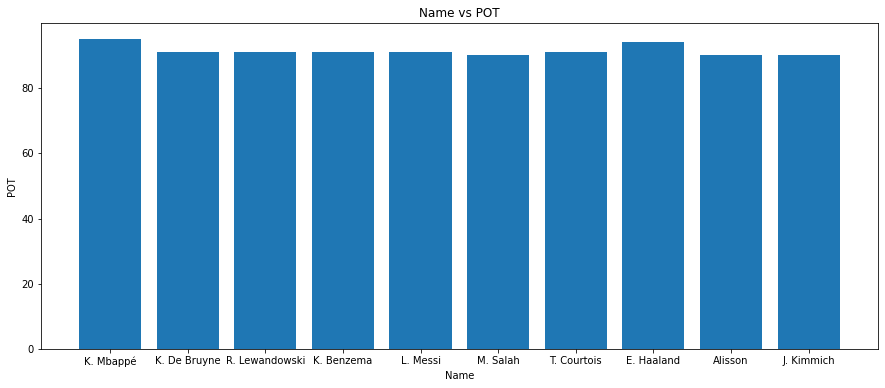

In [ ]:
# plotting bar graph 

x = fifa_final.Name.iloc[0:10]
y = fifa_final.POT.iloc[0:10]

plt.figure(figsize=(15, 6))
plt.bar(x,y)
plt.xlabel('Name')
plt.ylabel('POT')
plt.title('Name vs POT')

plt.show()

Q6.**Plot a graph - First 10 player's Name Vs Player's Wage**

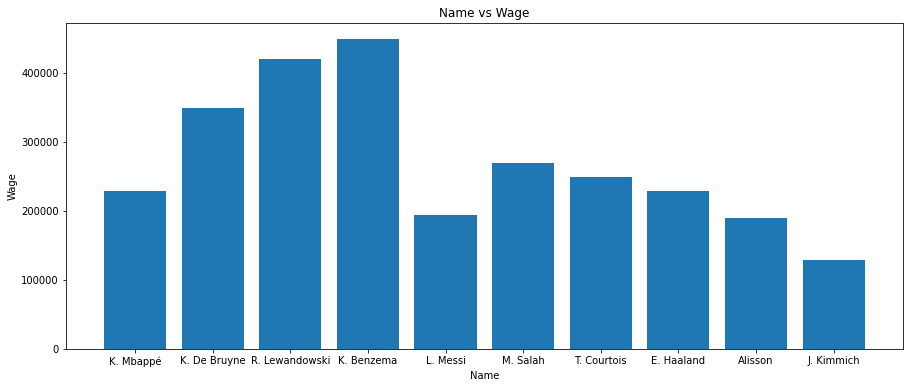

In [ ]:
# plotting bar grapgh
x = fifa_final.Name.iloc[0:10]
y = fifa_final.Wage.iloc[0:10]

plt.figure(figsize=(15,6))
plt.bar(x,y)
plt.xlabel('Name')
plt.ylabel('Wage')
plt.title("Name vs Wage")

plt.show()

Q7. **Find the Player(s) whose potential is more than 90**

In [ ]:
fifa_final.loc[fifa_final.POT > 90 ].iloc[:,[0,3]]


,Name,POT
0,K. Mbappé,95
1,K. De Bruyne,91
2,R. Lewandowski,91
3,K. Benzema,91
4,L. Messi,91
6,T. Courtois,91
7,E. Haaland,94
10,Ederson,91
18,Rúben Dias,91
19,G. Donnarumma,92


Q8. **Find the Player(s) whose potential is more than 90 but the age < 20**

In [ ]:
p = fifa_final.loc[fifa_final.POT > 90 ]
q = p.loc[fifa_final.Age<20].iloc[:,[0,1,3]]
q

,Name,Age,POT
62,J. Bellingham,19,91
63,Pedri,19,92
147,J. Musiala,19,92
199,F. Wirtz,19,91


 Q.9 **Find out the most Valuable Player.**

In [187]:
# first need to convert value column into float and remove 'M' symbol 

fifa_final.Value = fifa_final.Value.str.replace("M","")
fifa_final.Value = fifa_final.Value.astype(float)
maxval = fifa_final.Value.max()
fifa_final.loc[fifa_final.Value == maxval].iloc[:,[0,5]]

#renaming column name to Value(millions)



,Name,Value
0,K. Mbappé,190.5


In [188]:
 #renaming column name to Value(millions)

fifa_final.rename(columns = {'Value': 'Value(M)'}, inplace =True)

In [189]:
fifa_final

,Name,Age,OVA,POT,Team,Value(M),Wage,Total_stats
0,K. Mbappé,23,91,95,Paris Saint Germain,190.5,230K,2181
1,K. De Bruyne,31,91,91,Manchester City,107.5,350K,2298
2,R. Lewandowski,33,91,91,FC Barcelona,84.0,420K,2205
3,K. Benzema,34,91,91,Real Madrid,64.0,450K,2147
4,L. Messi,35,91,91,Paris Saint Germain,54.0,195K,2190
...,...,...,...,...,...,...,...,...
595,J. Correa,27,79,79,Inter,19.0,71K,1945
596,L. Zelarayán,30,79,79,Columbus Crew,17.0,12K,2032
597,F. Armani,35,79,79,River Plate,1.9,10K,1291
598,S. Azmoun,27,79,79,Bayer 04 Leverkusen,19.0,60K,1973


Q10. **List all the Paris Saint Germain players.**

```
fifa_final.loc[fifa_final.Team == 'Paris Saint Germain'	, 'Name']
```



In [190]:
fifa_final.loc[fifa_final.Team == 'Paris Saint Germain'].iloc[:,0]

0           K. Mbappé
4            L. Messi
16          Neymar Jr
19      G. Donnarumma
23         Marquinhos
35        M. Verratti
37           K. Navas
102         A. Hakimi
144      Sergio Ramos
156      Carlos Soler
170       Fabián Ruiz
171       P. Kimpembe
274       Nuno Mendes
374           Vitinha
479    Danilo Pereira
556    Renato Sanches
574        N. Mukiele
Name: Name, dtype: object

Q11. **Name the player with Highest total rating.**

In [185]:
maxtot = fifa_final.Total_stats.max()
fifa_final.loc[fifa_final.Total_stats == maxtot]

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
33,L. Goretzka,27,87,88,FC Bayern München,91M,115K,2312


Q12. **Who are the youngest and oldest players in the dataset?**

In [ ]:
young = fcopy.sort_values(by = 'Age').iloc[0,0]
old = fcopy.sort_values(by = 'Age', ascending = False).iloc[0,0]

print(f"The youngest player is {young} and the oldest player is {old}")

The youngest player is Gavi and the oldest player is Z. Ibrahimović


Q13. **What is the distribution of overall ratings in the dataset?**


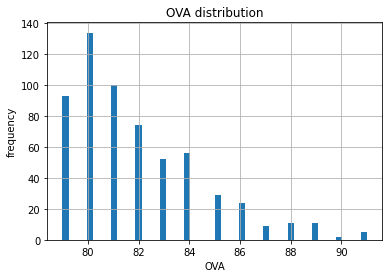

In [151]:
fifa_final.OVA.hist(bins=50)
plt.xlabel('OVA')
plt.ylabel('frequency')
plt.title('OVA distribution')
plt.show()

Q14. **Find out the Team having max. players in the Dataset.**

In [182]:
m = fifa_final.Team.value_counts()
print(f"Team {m.index[0]} has the maximum i.e {m[0]} players in the Dataset.")

Team Chelsea has the maximum i.e 20 players in the Dataset.


Q15. **How many teams are present in the Dataset?**

In [174]:
n = fifa_final.Team.nunique()
print(f"There are {n} unique teams present in the dataset")

There are 108 unique teams present in the dataset


**Find the correlation between the DataFrame.**

In [192]:
fifa_final.corr()

,Age,OVA,POT,Value(M),Total_stats
Age,1.000000,0.206513,-0.414118,-0.390964,-0.162791
OVA,0.206513,1.000000,0.683793,0.735686,0.126966
POT,-0.414118,0.683793,1.000000,0.834957,0.115170
Value(M),-0.390964,0.735686,0.834957,1.000000,0.277979
Total_stats,-0.162791,0.126966,0.115170,0.277979,1.000000


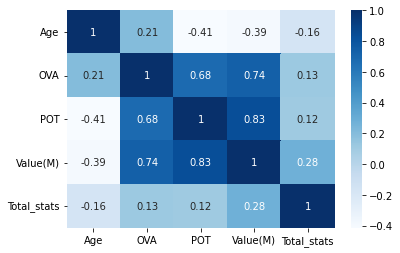

In [193]:
#plotting correlation onto graph

sns.heatmap(fifa_final.corr(), annot = True , cmap = 'Blues')

likewise many questions can be answered using the above Dataset.

# Conclusion
***In conclusion, data analysis of the FIFA players dataset provides valuable insights into the players' attributes and team distributions. By exploring the distribution of overall ratings, potentials, teams, and other relevant features, we can gain a deeper understanding of the data and identify trends, patterns, and outliers. This information can be useful for making informed decisions in player selection, team strategy, and other related fields. Overall, data analysis is a crucial step in the process of gaining insights and knowledge from large datasets.***